In [1]:
 import requests
 from bs4 import BeautifulSoup

In [2]:
base_url='https://www.airlinequality.com/airline-reviews/british-airways'
page_size=100
pages=10
reviews=[]

for i in range(1,pages+1):
  url=f'{base_url}/page/{i}/??sortby=post_date%3ADesc&pagesize={page_size}'

  response=requests.get(url)
  content=response.content
  parsed_content=BeautifulSoup(content,'html.parser')

  for para in parsed_content.find_all('div',{'class':'text_content'}):
    reviews.append(para.get_text())

  print(f'The page{i} have {len(reviews)} reviews')



The page1 have 100 reviews
The page2 have 200 reviews
The page3 have 300 reviews
The page4 have 400 reviews
The page5 have 500 reviews
The page6 have 600 reviews
The page7 have 700 reviews
The page8 have 800 reviews
The page9 have 900 reviews
The page10 have 1000 reviews


In [3]:
import pandas as pd

data=pd.DataFrame()
data['reviews']=reviews

In [4]:
data

,reviews
0,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
1,✅ Trip Verified | Not a great experience. I co...
2,Not Verified | I was excited to fly BA as I'd ...
3,Not Verified | I just want to warn everyone o...
4,Not Verified | Paid for business class travell...
...,...
995,✅ Trip Verified | Miami to Tel Aviv via Londo...
996,✅ Trip Verified | London to Seoul. I normally...
997,✅ Trip Verified | London Heathrow to New York...
998,✅ Trip Verified | San Diego to London. From th...


In [5]:
data['reviews']=data['reviews'].str.replace('✅ Trip','').str.replace('Not Verified','').str.replace('Verified','').str.replace('|','')

<ipython-input-5-cbf5f8fa48a9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['reviews']=data['reviews'].str.replace('✅ Trip','').str.replace('Not Verified','').str.replace('Verified','').str.replace('|','')


In [6]:
data['reviews'].head()

0        BA 246 21JAN 2023 Did not appreciate the u...
1       Not a great experience. I could not check i...
2      I was excited to fly BA as I'd not travelled...
3       I just want to warn everyone of the worst c...
4      Paid for business class travelling Cairo to ...
Name: reviews, dtype: object

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [12]:
data['Sentiment_scores']=data['reviews'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

In [13]:
data

,reviews,Sentiment_scores
0,BA 246 21JAN 2023 Did not appreciate the u...,0.5013
1,Not a great experience. I could not check i...,0.8749
2,I was excited to fly BA as I'd not travelled...,0.4770
3,I just want to warn everyone of the worst c...,-0.9357
4,Paid for business class travelling Cairo to ...,-0.9686
...,...,...
995,Miami to Tel Aviv via London. At Miami air...,0.9752
996,London to Seoul. I normally fly business b...,0.9808
997,London Heathrow to New York JFK. Bag drop ...,0.9334
998,San Diego to London. From the moment that I...,-0.7522


In [18]:
data['Sentiment_type']=data['Sentiment_scores'].apply(lambda score: 'Positive' if score>0 else ('Negative' if score< 0 else 'Neutral'))

In [19]:
data

,reviews,Sentiment_scores,Sentiment_type
0,BA 246 21JAN 2023 Did not appreciate the u...,0.5013,Positive
1,Not a great experience. I could not check i...,0.8749,Positive
2,I was excited to fly BA as I'd not travelled...,0.4770,Positive
3,I just want to warn everyone of the worst c...,-0.9357,Negative
4,Paid for business class travelling Cairo to ...,-0.9686,Negative
...,...,...,...
995,Miami to Tel Aviv via London. At Miami air...,0.9752,Positive
996,London to Seoul. I normally fly business b...,0.9808,Positive
997,London Heathrow to New York JFK. Bag drop ...,0.9334,Positive
998,San Diego to London. From the moment that I...,-0.7522,Negative


In [22]:
score=data['Sentiment_type'].value_counts(normalize=True)*100

([<matplotlib.patches.Wedge at 0x7f7eb6eeacb0>,
 [Text(-0.02073322272803588, 1.099804588768073, 'Negative'),
  Text(0.003455701743251942, -1.099994571861817, 'Positive'),
  Text(1.09986429624142, -0.017278016476613336, 'Neutral')],
 [Text(-0.011309030578928661, 0.5998934120553124, '50.6%'),
  Text(0.0018849282235919682, -0.5999970391973546, '48.9%'),
  Text(0.5999259797680472, -0.009424372623607272, '0.5%')])

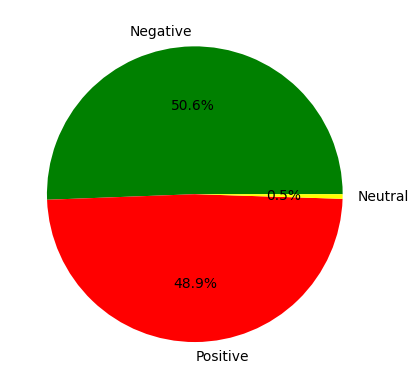

In [26]:
import matplotlib.pyplot as plt
plt.pie(score,labels=score.index,colors=['green','red','yellow'],autopct='%1.1f%%')

In [29]:
from nltk.tokenize import word_tokenize
from collections import Counter

all_words=''.join(char for char in data['reviews'])

In [57]:
  >>> import nltk
  >>> nltk.download('punkt')
  import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
all_words

'  \xa0\xa0BA 246 21JAN 2023 Did not appreciate the unprofessional attitude of the pilots. Flight scheduled departure 16:20. Advised boarding time 15:20. Whole flight full of passengers waiting at the gate to board at 15:20. 15:40 the cabin crew board. 15:55 the pilots board - each with a Sao Paulo Airport Duty Free branded shopping bag. 16:20 the flight is still boarding. Finally pushes back just before 17:00, 40 minutes late. Captain came on the intercom to announce the delay was due to \'traffic between the crew hotel and the airport\'. Sorry Captain the whole plane saw you and your pilot colleagues board fifteen minutes after the cabin crew clutching your duty free that you and your pilot colleagues still made time to stop for.   Not a great experience. I could not check in online as two separate parts of the BA computer system do not talk to each other. At LHR a delightful check in clerk sorted it quickly, manually! We boarded on time, but luggage loading had to be halted as the C

In [65]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def preprocess_text(text):
  text=text.lower()
  tokens=word_tokenize(text)
  tokens = [token for token in tokens if token not in stop_words]
  tokens= [token for token in tokens if token.isalnum()]
  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
final_words=preprocess_text(all_words)

In [67]:
final_words

['ba',
 '246',
 '21jan',
 '2023',
 'appreciate',
 'unprofessional',
 'attitude',
 'pilots',
 'flight',
 'scheduled',
 'departure',
 'advised',
 'boarding',
 'time',
 'whole',
 'flight',
 'full',
 'passengers',
 'waiting',
 'gate',
 'board',
 'cabin',
 'crew',
 'board',
 'pilots',
 'board',
 'sao',
 'paulo',
 'airport',
 'duty',
 'free',
 'branded',
 'shopping',
 'bag',
 'flight',
 'still',
 'boarding',
 'finally',
 'pushes',
 'back',
 '40',
 'minutes',
 'late',
 'captain',
 'came',
 'intercom',
 'announce',
 'delay',
 'due',
 'crew',
 'hotel',
 'airport',
 'sorry',
 'captain',
 'whole',
 'plane',
 'saw',
 'pilot',
 'colleagues',
 'board',
 'fifteen',
 'minutes',
 'cabin',
 'crew',
 'clutching',
 'duty',
 'free',
 'pilot',
 'colleagues',
 'still',
 'made',
 'time',
 'stop',
 'great',
 'experience',
 'could',
 'check',
 'online',
 'two',
 'separate',
 'parts',
 'ba',
 'computer',
 'system',
 'talk',
 'lhr',
 'delightful',
 'check',
 'clerk',
 'sorted',
 'quickly',
 'manually',
 'boarded'

In [68]:
word_counts = Counter(final_words)

In [69]:
word_count=pd.DataFrame(list(word_counts.items()),columns=['Words','Frequency'])

In [70]:
word_count.sort_values(by='Frequency',ascending=False)

,Words,Frequency
8,flight,1897
0,ba,1222
193,service,729
173,london,542
13,time,511
...,...,...
1297,withing,1
1295,ray,1
4816,eager,1
4819,sheet,1


In [73]:
top_20_words = word_counts.most_common(20)

In [81]:
top_20=pd.DataFrame(top_20_words,columns=['Words','Frequency'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'flight'),
  Text(1, 0, 'ba'),
  Text(2, 0, 'service'),
  Text(3, 0, 'london'),
  Text(4, 0, 'time'),
  Text(5, 0, 'seat'),
  Text(6, 0, 'food'),
  Text(7, 0, 'crew'),
  Text(8, 0, 'good'),
  Text(9, 0, 'class'),
  Text(10, 0, 'one'),
  Text(11, 0, 'british'),
  Text(12, 0, 'airways'),
  Text(13, 0, 'seats'),
  Text(14, 0, 'us'),
  Text(15, 0, 'would'),
  Text(16, 0, 'staff'),
  Text(17, 0, 'business'),
  Text(18, 0, 'get'),
  Text(19, 0, 'cabin')])

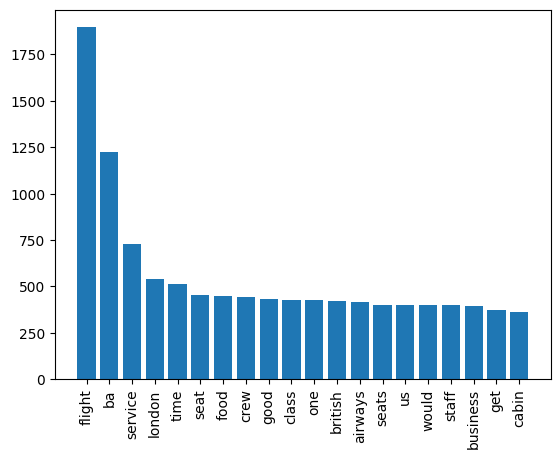

In [83]:
plt.bar(top_20['Words'],top_20['Frequency'])
plt.xticks(rotation=90)

In [84]:
from wordcloud import WordCloud
wordcloud = WordCloud(random_state=42).generate(' '.join(data['reviews']))


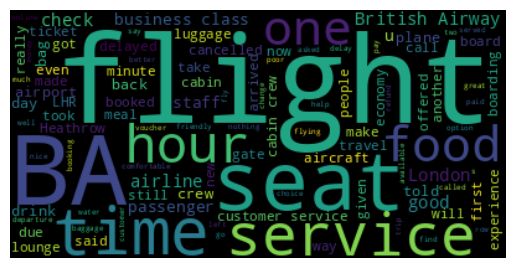

In [85]:
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [86]:
data

,reviews,Sentiment_scores,Sentiment_type
0,BA 246 21JAN 2023 Did not appreciate the u...,0.5013,Positive
1,Not a great experience. I could not check i...,0.8749,Positive
2,I was excited to fly BA as I'd not travelled...,0.4770,Positive
3,I just want to warn everyone of the worst c...,-0.9357,Negative
4,Paid for business class travelling Cairo to ...,-0.9686,Negative
...,...,...,...
995,Miami to Tel Aviv via London. At Miami air...,0.9752,Positive
996,London to Seoul. I normally fly business b...,0.9808,Positive
997,London Heathrow to New York JFK. Bag drop ...,0.9334,Positive
998,San Diego to London. From the moment that I...,-0.7522,Negative


In [88]:
top_20

,Words,Frequency
0,flight,1897
1,ba,1222
2,service,729
3,london,542
4,time,511
5,seat,451
6,food,446
7,crew,441
8,good,430
9,class,429


In [89]:
for index, row in top_20.iterrows():
    word = row['Words']
    # Extract reviews containing the word
    reviews_with_word = data[data['reviews'].str.lower().str.contains(word.lower())]
    # Calculate average sentiment score for reviews containing the word
    if not reviews_with_word.empty:
        average_score = reviews_with_word['Sentiment_scores'].mean()
        top_20.at[index, 'Sentiment_Score'] = average_score

In [95]:
top_20

,Words,Frequency,Sentiment_Score
0,flight,1897,0.032663
1,ba,1222,0.005921
2,service,729,0.078507
3,london,542,0.033574
4,time,511,0.098298
5,seat,451,0.130357
6,food,446,0.226584
7,crew,441,0.378313
8,good,430,0.490456
9,class,429,0.021854


In [98]:
top_20['Sentiment_type']=top_20['Sentiment_Score'].apply(lambda score:"Positive" if 0.5<=score<=1 else ('Negative' if score < 0 else "Neutral"))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'flight'),
  Text(1, 0, 'ba'),
  Text(2, 0, 'service'),
  Text(3, 0, 'london'),
  Text(4, 0, 'time'),
  Text(5, 0, 'seat'),
  Text(6, 0, 'food'),
  Text(7, 0, 'crew'),
  Text(8, 0, 'good'),
  Text(9, 0, 'class'),
  Text(10, 0, 'one'),
  Text(11, 0, 'british'),
  Text(12, 0, 'airways'),
  Text(13, 0, 'seats'),
  Text(14, 0, 'us'),
  Text(15, 0, 'would'),
  Text(16, 0, 'staff'),
  Text(17, 0, 'business'),
  Text(18, 0, 'get'),
  Text(19, 0, 'cabin')])

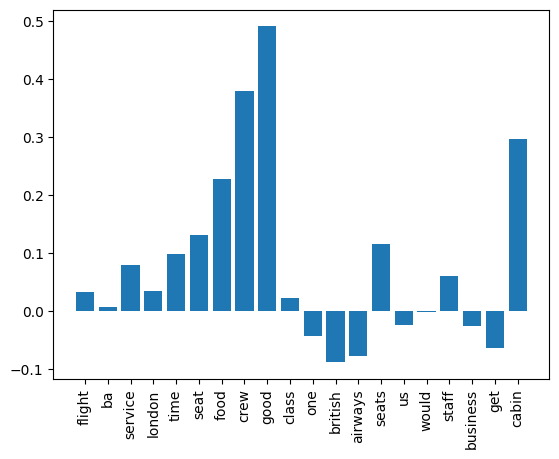

In [102]:
plt.bar(top_20['Words'],top_20['Sentiment_Score'])
plt.xticks(rotation=90)